In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
from pmdarima import auto_arima
import matplotlib.pyplot as plt

In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES - DATA COMPOSITION 4 (Fixed Test Set).csv', index_col="Month", parse_dates=True)
print(df)

            Tourist Arrival  Class
Month                             
2008-01-01           399556  Train
2008-01-02           411032  Train
2008-01-03           414332  Train
2008-01-04           395900  Train
2008-01-05           366387  Train
...                     ...    ...
2023-01-02           932969   Test
2023-01-03           895425   Test
2023-01-04           984146   Test
2023-01-05           916257   Test
2023-01-06           975010   Test

[186 rows x 2 columns]


In [3]:
df1=df.drop(["Class"], axis=1)
print(df1)

            Tourist Arrival
Month                      
2008-01-01           399556
2008-01-02           411032
2008-01-03           414332
2008-01-04           395900
2008-01-05           366387
...                     ...
2023-01-02           932969
2023-01-03           895425
2023-01-04           984146
2023-01-05           916257
2023-01-06           975010

[186 rows x 1 columns]


In [4]:
train = df1.loc['01/01/2008':'01/09/2018']
test = df1.loc['01/10/2018':]

In [5]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(df1, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=4777.194, Time=0.84 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4834.611, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4810.200, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4776.040, Time=0.14 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4836.110, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=4777.940, Time=0.15 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=4777.902, Time=0.34 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4810.745, Time=0.07 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=4779.969, Time=1.13 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=4763.324, Time=0.07 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=4765.152, Time=0.11 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=4774.230, Time=0.25 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=4805.891, Time=0.05 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=4773.320, Time=0.44 sec
 ARIMA(1,1,0)(0,1,1

In [6]:
train = df1.loc['01/01/2008':'01/09/2018']
test = df1.loc['01/10/2018':]

In [7]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [8]:
y_pred = stepwise_model.predict(n_periods=len(test))
print(y_pred)

129    1.239547e+06
130    1.334414e+06
131    1.336992e+06
132    1.444189e+06
133    1.489407e+06
134    1.404842e+06
135    1.301416e+06
136    1.342200e+06
137    1.306484e+06
138    1.359536e+06
139    1.447843e+06
140    1.342632e+06
141    1.369583e+06
142    1.464449e+06
143    1.467027e+06
144    1.574224e+06
145    1.619442e+06
146    1.534878e+06
147    1.431451e+06
148    1.472235e+06
149    1.436519e+06
150    1.489571e+06
151    1.577878e+06
152    1.472668e+06
153    1.499618e+06
154    1.594485e+06
155    1.597062e+06
156    1.704259e+06
157    1.749477e+06
158    1.664913e+06
159    1.561486e+06
160    1.602271e+06
161    1.566555e+06
162    1.619607e+06
163    1.707914e+06
164    1.602703e+06
165    1.629653e+06
166    1.724520e+06
167    1.727098e+06
168    1.834294e+06
169    1.879513e+06
170    1.794948e+06
171    1.691522e+06
172    1.732306e+06
173    1.696590e+06
174    1.749642e+06
175    1.837949e+06
176    1.732738e+06
177    1.759689e+06
178    1.854555e+06


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [9]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [10]:
RMSE = np.sqrt(mean_squared_error(test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 1214298.0364241246


In [11]:
MAE = mean_absolute_error(test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 1046363.8858311672


In [12]:
MAPE = mean_absolute_percentage_error(test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 2.2331221503712842e+21


In [13]:
def SMAPE(test, y_pred):
    return 100/len(test) * np.sum(2 * np.abs(test - y_pred) / (np.abs(test) + np.abs(y_pred)))
result = SMAPE(test, y_pred)
print("SMAPE :", result)

SMAPE : Tourist Arrival    0.0
129                0.0
130                0.0
131                0.0
132                0.0
133                0.0
134                0.0
135                0.0
136                0.0
137                0.0
138                0.0
139                0.0
140                0.0
141                0.0
142                0.0
143                0.0
144                0.0
145                0.0
146                0.0
147                0.0
148                0.0
149                0.0
150                0.0
151                0.0
152                0.0
153                0.0
154                0.0
155                0.0
156                0.0
157                0.0
158                0.0
159                0.0
160                0.0
161                0.0
162                0.0
163                0.0
164                0.0
165                0.0
166                0.0
167                0.0
168                0.0
169                0.0
170                0.0
171

In [14]:
def RMSPE(test, y_pred):
    return np.sqrt(np.nanmean(np.square(((test - y_pred) / test))))*100
result1 = RMSPE(test, y_pred)
print("RMSPE :", result1)

RMSPE : nan


/var/folders/w4/3f8pkphx2j78qktgvt5lpdvw0000gn/T/ipykernel_10412/1017728051.py:2: RuntimeWarning: Mean of empty slice
  return np.sqrt(np.nanmean(np.square(((test - y_pred) / test))))*100


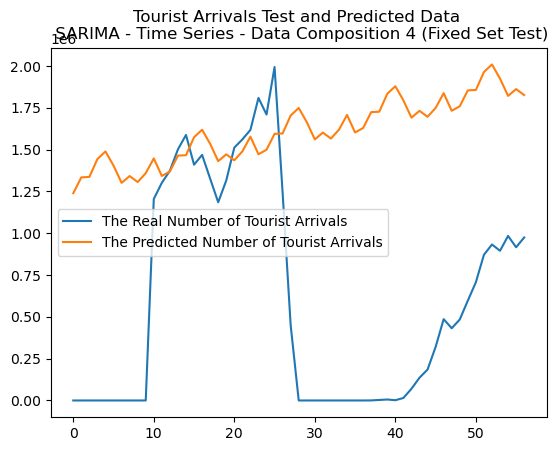

In [15]:
x_ax = range(len(test))
plt.plot(x_ax, test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n SARIMA - Time Series - Data Composition 4 (Fixed Set Test)")
plt.legend()
plt.show()